In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
df = pd.read_csv("cleaned_train.csv")

In [3]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=False)  
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=False)

In [6]:
category_columns = [
    "Ship Mode",
    "Segment",
    "Region",
    "Category",
    "Sub-Category"
]

for col in category_columns:
    df[col] = df[col].astype("category")

In [7]:
df = df.sort_values("Order Date")

In [8]:
df.set_index("Order Date", inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9799 entries, 2015-01-03 to 2018-12-30
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9799 non-null   object        
 1   Ship Date      9799 non-null   datetime64[ns]
 2   Ship Mode      9799 non-null   category      
 3   Customer ID    9799 non-null   object        
 4   Customer Name  9799 non-null   object        
 5   Segment        9799 non-null   category      
 6   City           9799 non-null   object        
 7   State          9799 non-null   object        
 8   Postal Code    9799 non-null   float64       
 9   Region         9799 non-null   category      
 10  Product ID     9799 non-null   object        
 11  Category       9799 non-null   category      
 12  Sub-Category   9799 non-null   category      
 13  Product Name   9799 non-null   object        
 14  Sales          9799 non-null   float64       
dtypes: 

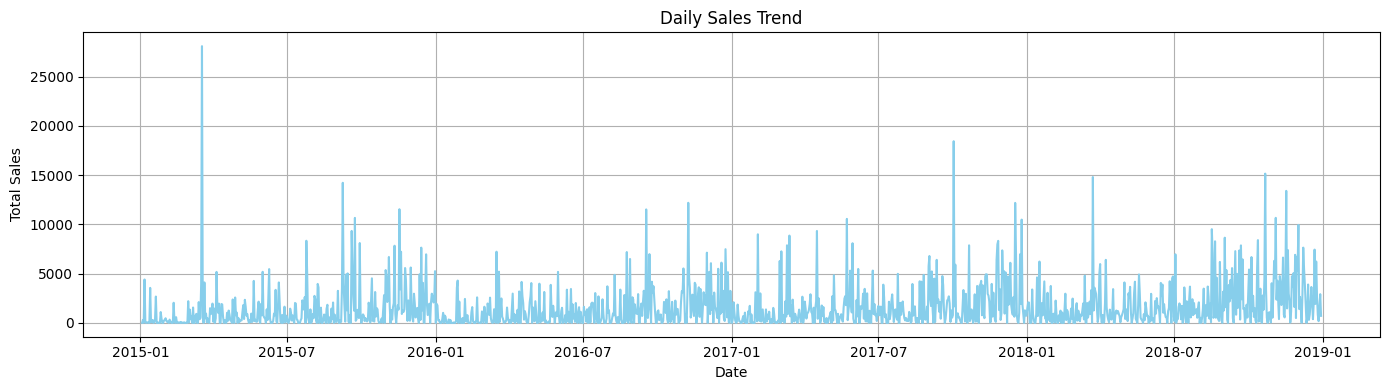

In [10]:
daily_sales = df["Sales"].resample("D").sum()

plt.figure(figsize=(14, 4))
plt.plot(daily_sales, color="skyblue")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

### Daily Sales Trend

Sales fluctuate irregularly, with sharp spikes on certain days. After 2017, sales activity appears to increase, indicating higher demand in some periods.

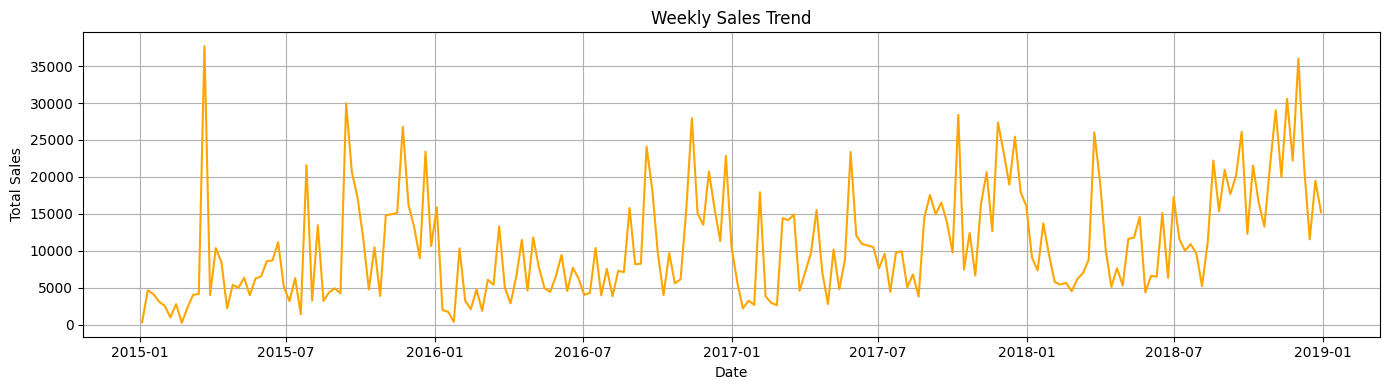

In [11]:
weekly_sales = df["Sales"].resample("W").sum()

plt.figure(figsize=(14, 4))
plt.plot(weekly_sales, color="orange")
plt.title("Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekly Sales Trend

Weekly sales show an upward trend over time, especially after 2017. Despite fluctuations, sales volumes become more consistent and higher toward the end of the period.

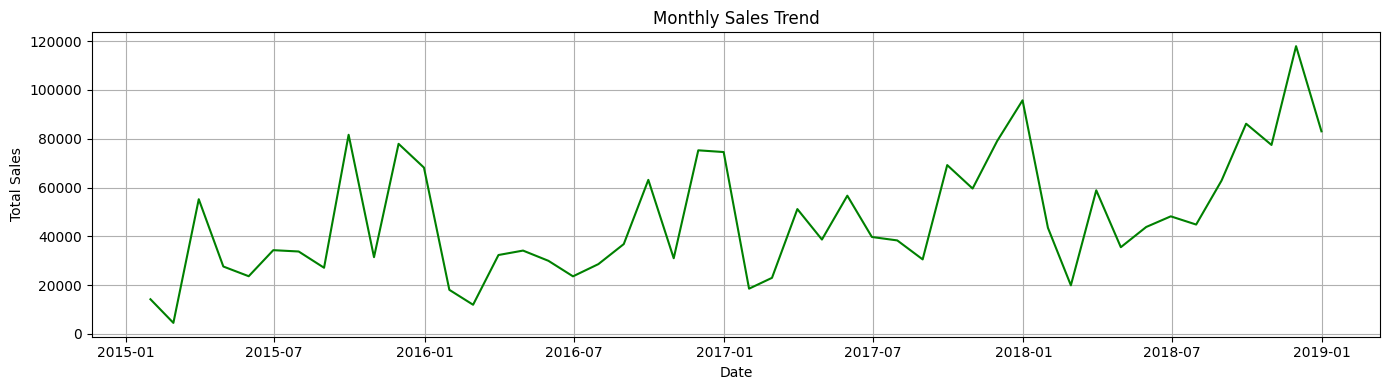

In [12]:
monthly_sales = df["Sales"].resample("ME").sum()

plt.figure(figsize=(14, 4))
plt.plot(monthly_sales, color="green")
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

### Monthly Sales Trend

Monthly sales follow an upward trend, with a clear peak at the end of 2018. Noticeable fluctuations are present throughout the period, but overall performance improves steadily over the years.

In [13]:
print(df.index)

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-04', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-06', '2015-01-06',
               '2015-01-06', '2015-01-06',
               ...
               '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-30',
               '2018-12-30', '2018-12-30', '2018-12-30', '2018-12-30',
               '2018-12-30', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9799, freq=None)


In [14]:
monthly_subcat_sales = df.groupby([pd.Grouper(freq="ME"), "Sub-Category"])["Sales"].sum().reset_index()

C:\Users\stajyer\AppData\Local\Temp\ipykernel_18116\272351268.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_subcat_sales = df.groupby([pd.Grouper(freq="ME"), "Sub-Category"])["Sales"].sum().reset_index()


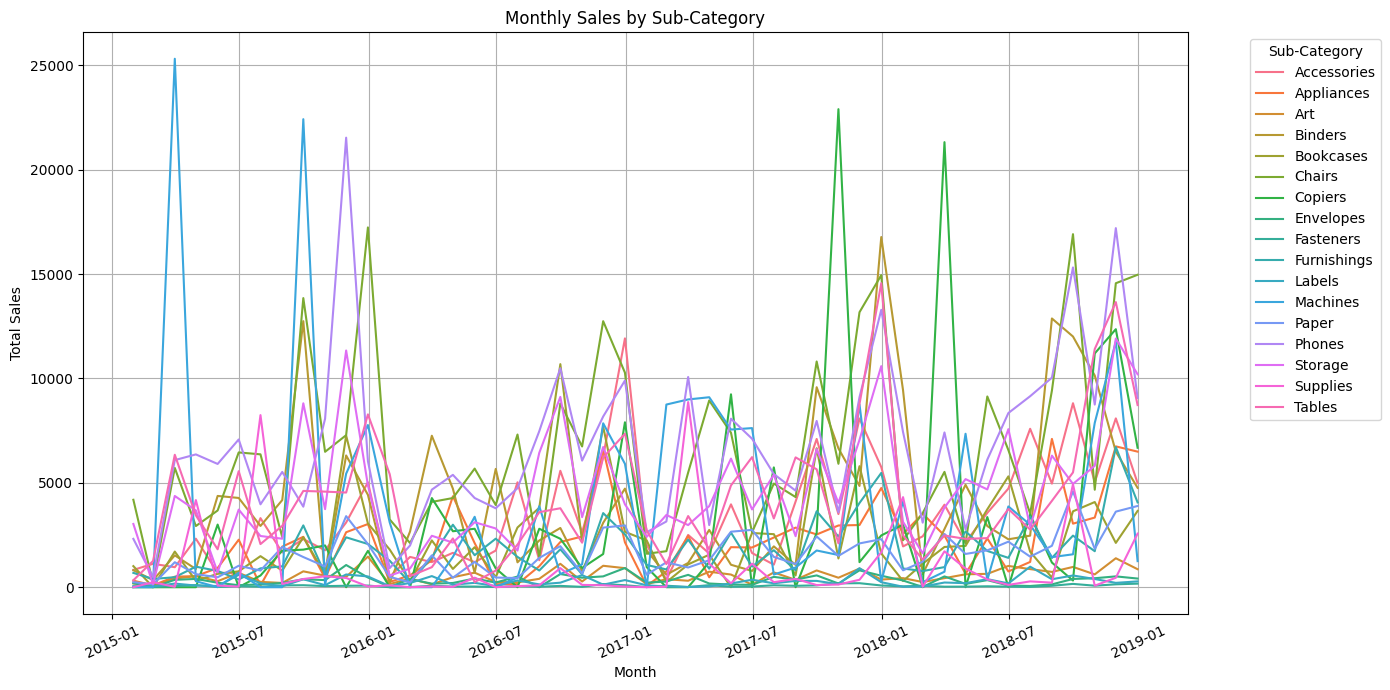

In [15]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_subcat_sales,
    x="Order Date",
    y="Sales",
    hue="Sub-Category"
)
plt.title("Monthly Sales by Sub-Category")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=25)
plt.grid(True)
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

### Monthly Sales by Sub-Category

Except for a few sharp peaks, most products maintain sales within a consistent range over time.

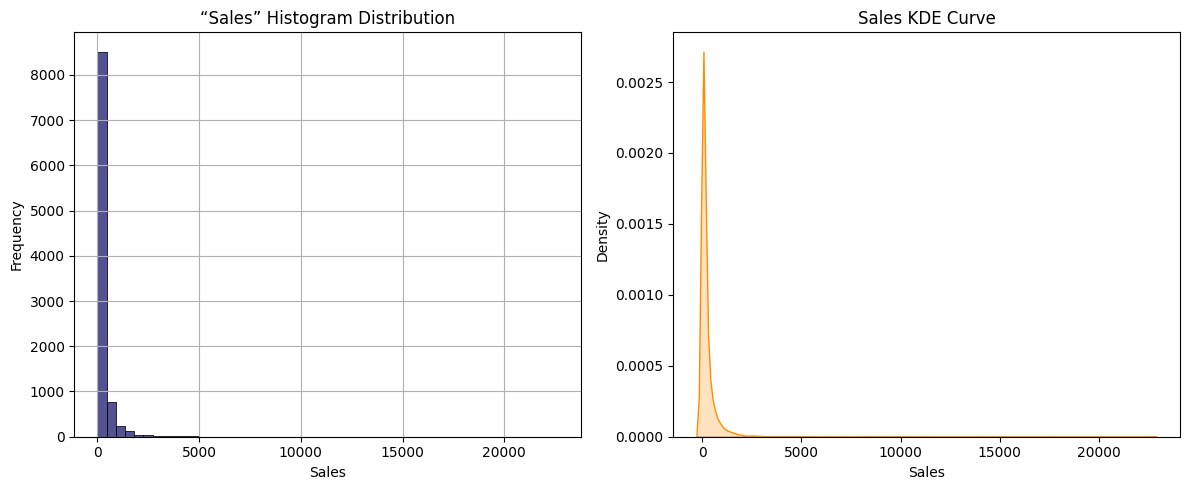

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.histplot(df["Sales"], bins=50, color="midnightblue")
plt.title("“Sales” Histogram Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.kdeplot(df["Sales"], color="darkorange", fill=True)
plt.title("Sales KDE Curve")
plt.xlabel("Sales")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

### Sales Distribution

Most transactions are concentrated in low amounts.

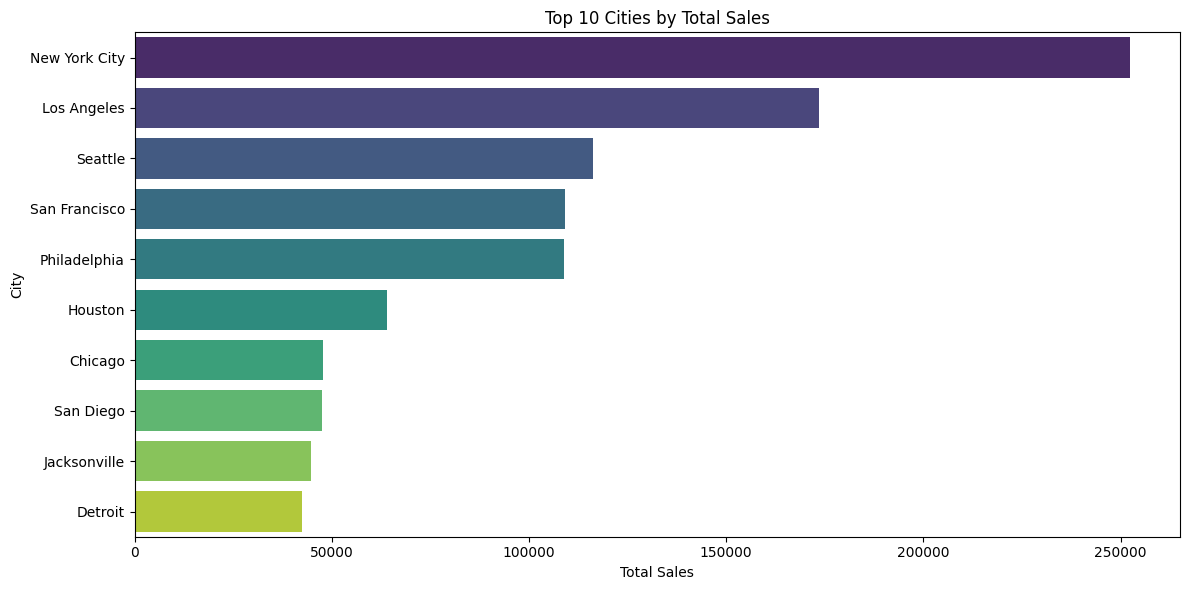

In [18]:
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=city_sales.values, y=city_sales.index, hue=city_sales.index, palette="viridis", legend=False)
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.tight_layout()

plt.show()

### Top 10 Cities by Total Sales

New York City and Los Angeles lead total sales by a large margin, followed by Seattle. Major metropolitan areas clearly dominate sales performance.

C:\Users\stajyer\AppData\Local\Temp\ipykernel_18116\3006186682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x="Sales", y="Sub-Category", palette="coolwarm")


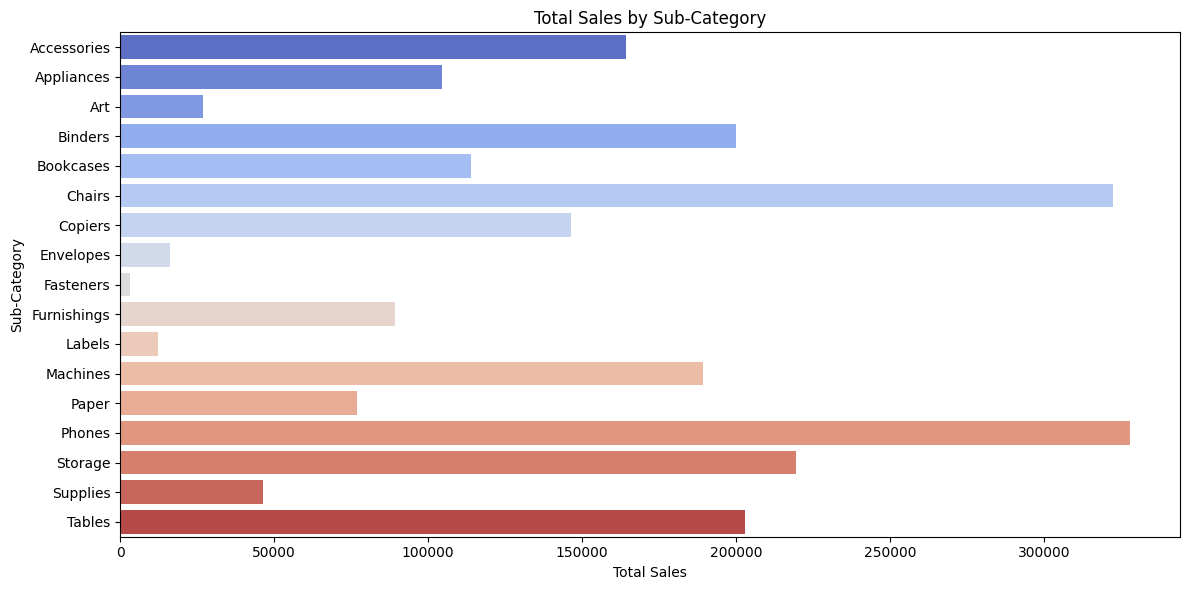

In [19]:
product_sales = df.groupby(["Sub-Category"], observed = False)["Sales"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=product_sales, x="Sales", y="Sub-Category", palette="coolwarm")
plt.title("Total Sales by Sub-Category")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

### Total Sales by Sub-Category

Phones and Chairs have the highest total sales among all sub-categories. Most others remain significantly lower in comparison.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9799 entries, 2015-01-03 to 2018-12-30
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9799 non-null   object        
 1   Ship Date      9799 non-null   datetime64[ns]
 2   Ship Mode      9799 non-null   category      
 3   Customer ID    9799 non-null   object        
 4   Customer Name  9799 non-null   object        
 5   Segment        9799 non-null   category      
 6   City           9799 non-null   object        
 7   State          9799 non-null   object        
 8   Postal Code    9799 non-null   float64       
 9   Region         9799 non-null   category      
 10  Product ID     9799 non-null   object        
 11  Category       9799 non-null   category      
 12  Sub-Category   9799 non-null   category      
 13  Product Name   9799 non-null   object        
 14  Sales          9799 non-null   float64       
dtypes: 

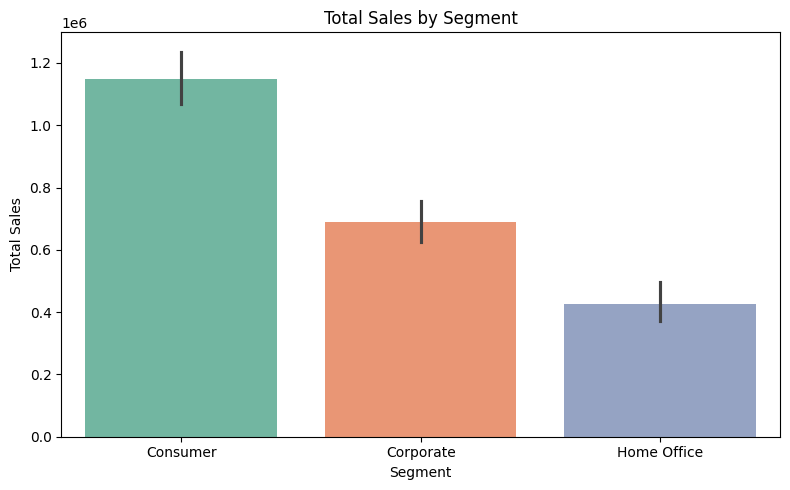

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Segment", y="Sales", estimator="sum", hue = "Segment", palette="Set2", legend = False)
plt.title("Total Sales by Segment")
plt.ylabel("Total Sales")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()

### Total Sales by Segment

The Consumer segment has the highest total sales, followed by Corporate and Home Office. Individual customers clearly drive most of the revenue.

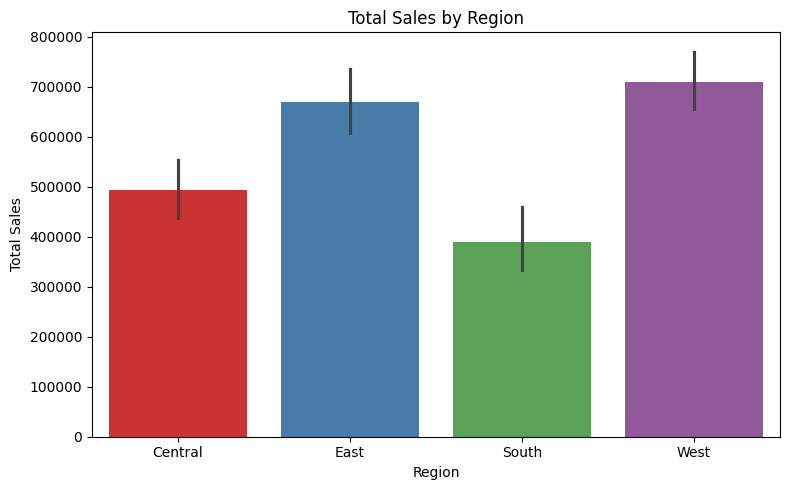

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Region", y="Sales", estimator="sum", hue = "Region", palette="Set1", legend = False)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

### Total Sales by Region

The West and East regions have the highest total sales, while the South region shows the lowest. Regional performance varies significantly.

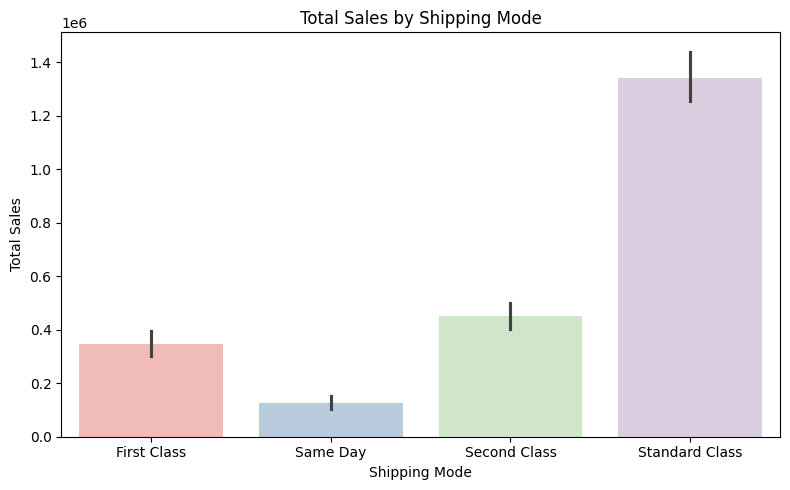

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Ship Mode", y="Sales", estimator="sum", hue = "Ship Mode", palette="Pastel1", legend = False)
plt.title("Total Sales by Shipping Mode")
plt.ylabel("Total Sales")
plt.xlabel("Shipping Mode")
plt.tight_layout()
plt.show()

### Total Sales by Shipping Mode

Standard Class accounts for the highest total sales, while Same Day deliveries contribute the least. Most customers prefer cost-effective shipping options.

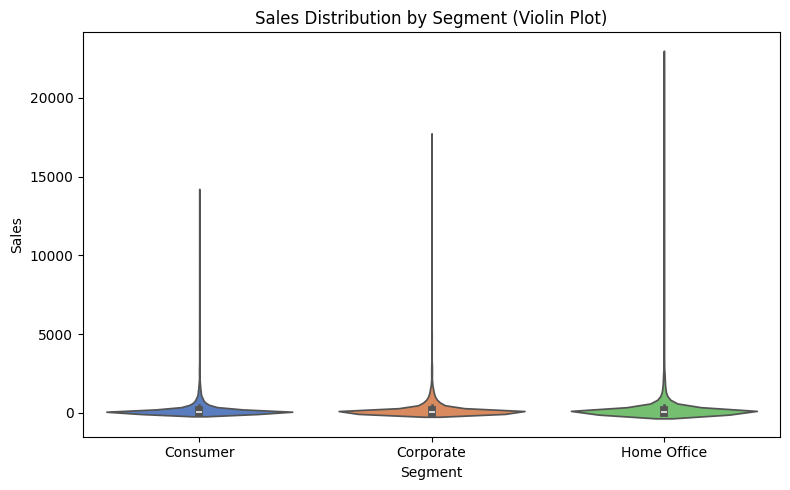

In [24]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Segment", y="Sales", hue = "Segment", palette="muted", legend = False)
plt.title("Sales Distribution by Segment (Violin Plot)")
plt.tight_layout()
plt.show()

### Sales Distribution by Segment (Violin Plot)

Sales are concentrated at lower values across all segments, but each contains extreme high-value outliers. Distribution shapes are similar overall.

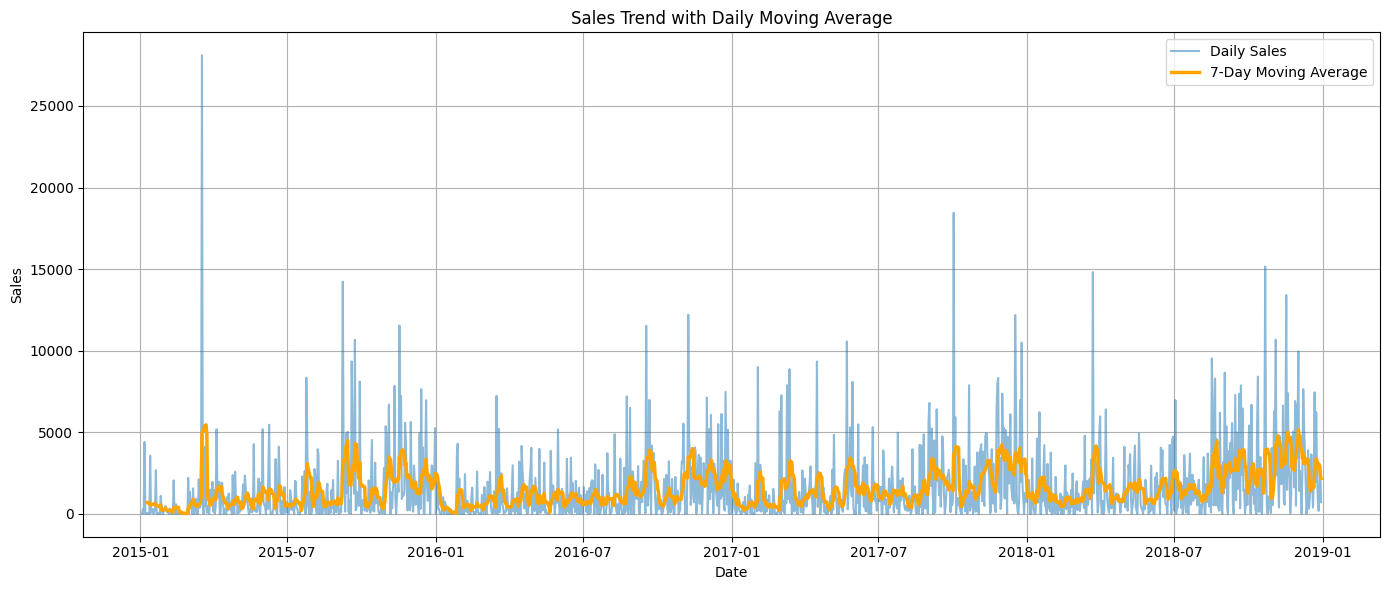

In [25]:
daily_sales = df["Sales"].resample("D").sum()
moving_avg = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales, label="Daily Sales", alpha=0.5)
plt.plot(moving_avg, label="7-Day Moving Average", linewidth=2.5, color='orange')
plt.title("Sales Trend with Daily Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Daily Sales with Moving Average

The 7-day moving average smooths out daily fluctuations and reveals a slight upward trend over time. Spikes in daily sales are frequent but not consistent.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9799 entries, 2015-01-03 to 2018-12-30
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9799 non-null   object        
 1   Ship Date      9799 non-null   datetime64[ns]
 2   Ship Mode      9799 non-null   category      
 3   Customer ID    9799 non-null   object        
 4   Customer Name  9799 non-null   object        
 5   Segment        9799 non-null   category      
 6   City           9799 non-null   object        
 7   State          9799 non-null   object        
 8   Postal Code    9799 non-null   float64       
 9   Region         9799 non-null   category      
 10  Product ID     9799 non-null   object        
 11  Category       9799 non-null   category      
 12  Sub-Category   9799 non-null   category      
 13  Product Name   9799 non-null   object        
 14  Sales          9799 non-null   float64       
dtypes: 

C:\Users\stajyer\AppData\Local\Temp\ipykernel_18116\2075631038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales_cat, x="Sales", y="Category", palette="icefire", legend=False)


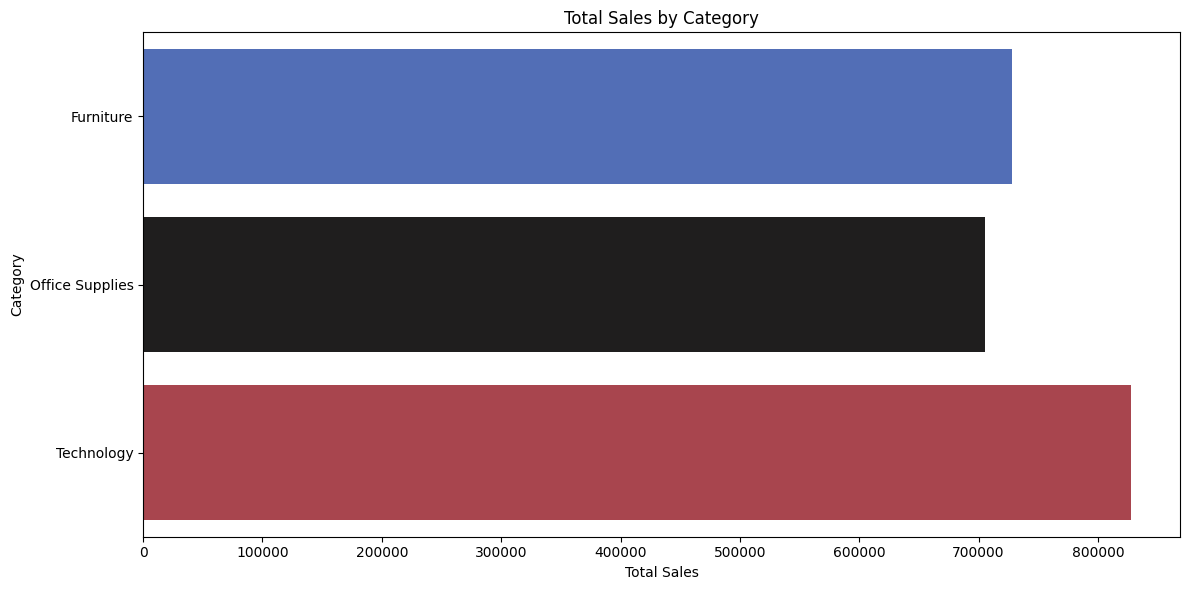

In [27]:
product_sales_cat = df.groupby(["Category"], observed = False)["Sales"].sum().reset_index()

plt.figure(figsize= (12,6))
sns.barplot(data=product_sales_cat, x="Sales", y="Category", palette="icefire", legend=False)
plt.title("Total Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

### "Key product categories, top-performing cities, and important customer segments"
The categories "Phones" and "Chairs" generate the highest total sales, indicating strong customer demand in these areas.
New York City and Los Angeles lead in total sales among cities, likely due to large populations and economic activity.
Among customer segments, "Consumer" dominates sales, suggesting that individual shoppers are the primary revenue drivers.

### Seasonal Trends and Sales Fluctuations
Sales data shows noticeable peaks during the end of each year, especially in November and December. These increases likely reflect seasonal shopping periods, such as Black Friday and holiday promotions. In contrast, sales tend to drop slightly during the summer months, which may be due to vacation periods or lower business activity.

### Cross-Selling Opportunities and Marketing Strategies
The analysis shows that categories like Phones, Chairs, and Storage have high sales volumes. These product types are often bought by office or home users, which creates a chance for cross-selling. For example, customers who buy Phones could also be offered Accessories or Storage products. Similarly, people buying Chairs may also need Office Supplies like Paper or Binders. Marketing campaigns can focus on the Consumer segment, which has the highest purchase volume, and target cities like New York and Los Angeles, where total sales are highest. Less popular categories like Fasteners or Envelopes can be promoted together with top-selling items to improve their visibility and sales.

In [28]:
df.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,
2015-01-03,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2015-01-05,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


In [29]:
df = df.dropna(subset=["Postal Code", "Sales"])  

X = df[["Postal Code"]]
y = df["Sales"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
LinModel = LinearRegression()
LinModel.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred = LinModel.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 216409.0089650951
R² Score: -0.002866795277447931


In [34]:
df.columns

Index(['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [35]:
df.columns = df.columns.str.strip()

df_encoded = pd.get_dummies(df, columns=["Category"], drop_first=True)

X = df_encoded[["Category_Office Supplies", "Category_Technology"]]  
y = df_encoded["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LinModel2 = LinearRegression()
LinModel2.fit(X_train, y_train)

y_pred = LinModel2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 194923.74211645318
R² Score: 0.09669865633299601


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9799 entries, 2015-01-03 to 2018-12-30
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9799 non-null   object        
 1   Ship Date      9799 non-null   datetime64[ns]
 2   Ship Mode      9799 non-null   category      
 3   Customer ID    9799 non-null   object        
 4   Customer Name  9799 non-null   object        
 5   Segment        9799 non-null   category      
 6   City           9799 non-null   object        
 7   State          9799 non-null   object        
 8   Postal Code    9799 non-null   float64       
 9   Region         9799 non-null   category      
 10  Product ID     9799 non-null   object        
 11  Category       9799 non-null   category      
 12  Sub-Category   9799 non-null   category      
 13  Product Name   9799 non-null   object        
 14  Sales          9799 non-null   float64       
dtypes: 

In [37]:
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    non_zero_idx = y_test != 0
    return np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE (%):", mape)

MSE: 194923.74211645318
RMSE: 441.5016898228739
MAPE (%): 806.7439690737299


In [38]:
print(df.columns)


Index(['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')


In [39]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["day_of_week"] = df.index.dayofweek  
df["week"] = df.index.isocalendar().week
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0) 

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["month"].apply(get_season)


In [40]:
df[["year", "month", "day", "day_of_week", "week", "is_weekend", "season"]].head(20)

,year,month,day,day_of_week,week,is_weekend,season
Order Date,,,,,,,
2015-01-03,2015,1,3,5,1,1,Winter
2015-01-04,2015,1,4,6,1,1,Winter
2015-01-04,2015,1,4,6,1,1,Winter
2015-01-04,2015,1,4,6,1,1,Winter
2015-01-05,2015,1,5,0,2,0,Winter
2015-01-06,2015,1,6,1,2,0,Winter
2015-01-06,2015,1,6,1,2,0,Winter
2015-01-06,2015,1,6,1,2,0,Winter
2015-01-06,2015,1,6,1,2,0,Winter


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9799 entries, 2015-01-03 to 2018-12-30
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9799 non-null   object        
 1   Ship Date      9799 non-null   datetime64[ns]
 2   Ship Mode      9799 non-null   category      
 3   Customer ID    9799 non-null   object        
 4   Customer Name  9799 non-null   object        
 5   Segment        9799 non-null   category      
 6   City           9799 non-null   object        
 7   State          9799 non-null   object        
 8   Postal Code    9799 non-null   float64       
 9   Region         9799 non-null   category      
 10  Product ID     9799 non-null   object        
 11  Category       9799 non-null   category      
 12  Sub-Category   9799 non-null   category      
 13  Product Name   9799 non-null   object        
 14  Sales          9799 non-null   float64       
 15  yea

In [42]:
df

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,Sub-Category,Product Name,Sales,year,month,day,day_of_week,week,is_weekend,season
Order Date,,,,,,,,,,,,,,,,,,,,,
2015-01-03,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095.0,Central,...,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015,1,3,5,1,1,Winter
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,...,Labels,Avery 508,11.784,2015,1,4,6,1,1,Winter
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,...,Storage,SAFCO Boltless Steel Shelving,272.736,2015,1,4,6,1,1,Winter
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,...,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015,1,4,6,1,1,Winter
2015-01-05,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143.0,East,...,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015,1,5,0,2,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30,CA-2018-143259,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009.0,East,...,Binders,Wilson Jones Legal Size Ring Binders,52.776,2018,12,30,6,52,1,Winter
2018-12-30,CA-2018-156720,2019-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,80538.0,West,...,Fasteners,Bagged Rubber Bands,3.024,2018,12,30,6,52,1,Winter
2018-12-30,CA-2018-126221,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,Indiana,47201.0,Central,...,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2018,12,30,6,52,1,Winter


In [43]:
daily_sales_df = pd.DataFrame({'Sales': daily_sales})

daily_sales_df['Sales_lag1'] = daily_sales_df['Sales'].shift(1)
daily_sales_df['Sales_lag7'] = daily_sales_df['Sales'].shift(7)
daily_sales_df['Sales_lag30'] = daily_sales_df['Sales'].shift(30)


In [44]:
daily_sales_df = daily_sales_df.dropna()

In [45]:
df = df.join(daily_sales_df[['Sales_lag1', 'Sales_lag7', 'Sales_lag30']])

In [46]:
df.head(130)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,year,month,day,day_of_week,week,is_weekend,season,Sales_lag1,Sales_lag7,Sales_lag30
Order Date,,,,,,,,,,,,,,,,,,,,,
2015-01-03,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095.0,Central,...,2015,1,3,5,1,1,Winter,NaN,NaN,NaN
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,...,2015,1,4,6,1,1,Winter,NaN,NaN,NaN
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,...,2015,1,4,6,1,1,Winter,NaN,NaN,NaN
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,...,2015,1,4,6,1,1,Winter,NaN,NaN,NaN
2015-01-05,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143.0,East,...,2015,1,5,0,2,0,Winter,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-01,CA-2015-104269,2015-03-06,Second Class,DB-13060,Dave Brooks,Consumer,Seattle,Washington,98115.0,West,...,2015,3,1,6,9,1,Spring,0.0,19.44,240.5
2015-03-01,CA-2015-131009,2015-03-05,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,79907.0,Central,...,2015,3,1,6,9,1,Spring,0.0,19.44,240.5
2015-03-01,CA-2015-168312,2015-03-07,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,Texas,77036.0,Central,...,2015,3,1,6,9,1,Spring,0.0,19.44,240.5


In [47]:
df.info

<bound method DataFrame.info of                   Order ID  Ship Date       Ship Mode Customer ID  \
Order Date                                                          
2015-01-03  CA-2015-103800 2015-01-07  Standard Class    DP-13000   
2015-01-04  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-04  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-04  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-05  CA-2015-141817 2015-01-12  Standard Class    MB-18085   
...                    ...        ...             ...         ...   
2018-12-30  CA-2018-143259 2019-01-03  Standard Class    PO-18865   
2018-12-30  CA-2018-156720 2019-01-03  Standard Class    JM-15580   
2018-12-30  CA-2018-126221 2019-01-05  Standard Class    CC-12430   
2018-12-30  CA-2018-143259 2019-01-03  Standard Class    PO-18865   
2018-12-30  CA-2018-115427 2019-01-03  Standard Class    EB-13975   

                Customer Name      Segment           City         Stat

In [48]:
df.dropna(subset=['Sales_lag1', 'Sales_lag7', 'Sales_lag30'], inplace=True)
df.head(130)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,year,month,day,day_of_week,week,is_weekend,season,Sales_lag1,Sales_lag7,Sales_lag30
Order Date,,,,,,,,,,,,,,,,,,,,,
2015-02-02,CA-2015-139857,2015-02-06,Standard Class,CD-12790,Cynthia Delaney,Home Office,San Diego,California,92037.0,West,...,2015,2,2,0,6,0,Winter,468.900,1097.250,16.448
2015-02-02,CA-2015-123400,2015-02-09,Standard Class,EB-13930,Eric Barreto,Consumer,Saint Petersburg,Florida,33710.0,South,...,2015,2,2,0,6,0,Winter,468.900,1097.250,16.448
2015-02-02,CA-2015-123400,2015-02-09,Standard Class,EB-13930,Eric Barreto,Consumer,Saint Petersburg,Florida,33710.0,South,...,2015,2,2,0,6,0,Winter,468.900,1097.250,16.448
2015-02-03,CA-2015-111059,2015-02-06,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Seattle,Washington,98105.0,West,...,2015,2,3,1,6,0,Winter,211.646,426.670,288.060
2015-02-03,CA-2015-111059,2015-02-06,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Seattle,Washington,98105.0,West,...,2015,2,3,1,6,0,Winter,211.646,426.670,288.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-17,US-2015-164763,2015-03-21,Standard Class,MH-17440,Mark Haberlin,Corporate,Jackson,Mississippi,39212.0,South,...,2015,3,17,1,12,0,Spring,471.920,741.956,21.360
2015-03-17,US-2015-164763,2015-03-21,Standard Class,MH-17440,Mark Haberlin,Corporate,Jackson,Mississippi,39212.0,South,...,2015,3,17,1,12,0,Spring,471.920,741.956,21.360
2015-03-17,CA-2015-127859,2015-03-20,Second Class,QJ-19255,Quincy Jones,Corporate,Philadelphia,Pennsylvania,19134.0,East,...,2015,3,17,1,12,0,Spring,471.920,741.956,21.360


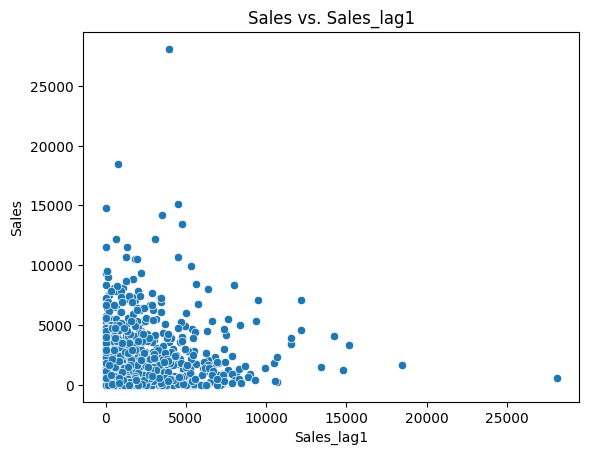

In [49]:
sns.scatterplot(data=daily_sales_df, x='Sales_lag1', y='Sales')
plt.title('Sales vs. Sales_lag1')
plt.show()

### Sales vs. Sales_lag1

The graph reveals no significant relationship between Sales_lag1 and Sales. This suggests that the previous day's sales do not meaningfully influence the current day's sales.
The concentration of sales at lower levels indicates that the overall sales trend is low, with higher sales being less frequent.

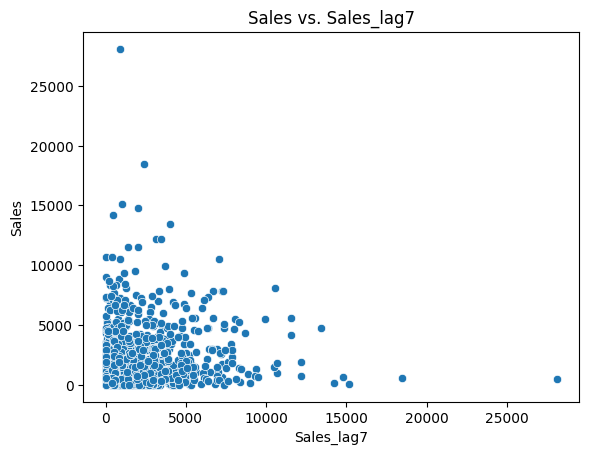

In [50]:
sns.scatterplot(data=daily_sales_df, x='Sales_lag7', y='Sales')
plt.title('Sales vs. Sales_lag7')
plt.show()

### Sales vs. Sales_lag7

The graph reveals no significant relationship between Sales_lag7 and Sales. This suggests that sales from 7 days ago do not meaningfully influence the current day's sales.
The concentration of points at lower sales values indicates that the overall sales trend remains low, with higher sales being rare.

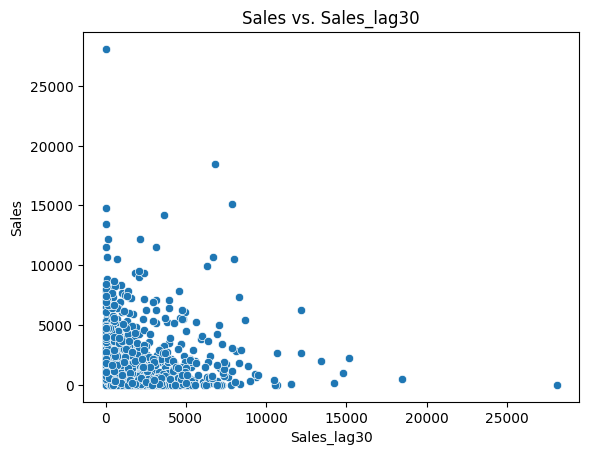

In [51]:
sns.scatterplot(data=daily_sales_df, x='Sales_lag30', y='Sales')
plt.title('Sales vs. Sales_lag30')
plt.show()

### Sales vs. Sales_lag30

The graph reveals no significant relationship between Sales_lag30 and Sales. This suggests that sales from 30 days ago do not meaningfully influence the current day's sales.
The concentration of points at lower sales values indicates that the overall sales trend remains low, with higher sales being rare.

In [52]:
daily_sales_df[['Sales', 'Sales_lag1', 'Sales_lag7', 'Sales_lag30']].corr()

,Sales,Sales_lag1,Sales_lag7,Sales_lag30
Sales,1.000000,0.128525,0.184247,0.025008
Sales_lag1,0.128525,1.000000,0.131888,0.064345
Sales_lag7,0.184247,0.131888,1.000000,-0.002887
Sales_lag30,0.025008,0.064345,-0.002887,1.000000


In [53]:
from prophet import Prophet

daily_sales_prophet=df.groupby("Order Date")["Sales"].sum().reset_index()
daily_sales_prophet.columns=["ds","y"]

train_size = int(len(daily_sales_prophet) * 0.85)
train = daily_sales_prophet.iloc[:train_size]
test = daily_sales_prophet.iloc[train_size:]

prophet=Prophet()
prophet.fit(daily_sales_prophet)

future=prophet.make_future_dataframe(periods=7,freq="D")
forecasts_prophet=prophet.predict(future)

forecasts_prophet_7=forecasts_prophet[["ds","yhat"]].tail(7)

C:\Users\stajyer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing


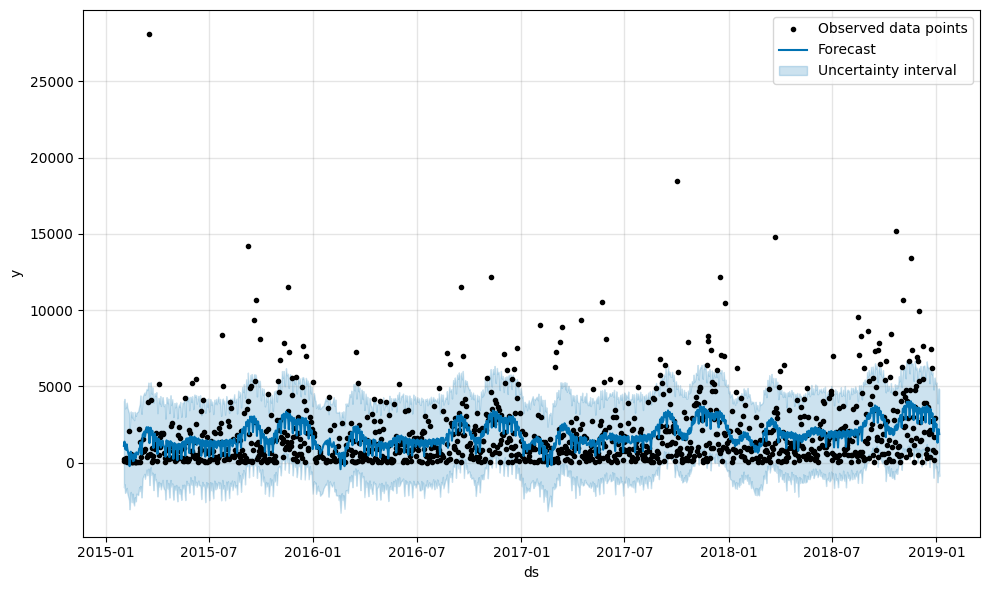

In [54]:
prophet.plot(forecasts_prophet)
plt.legend()
plt.show()

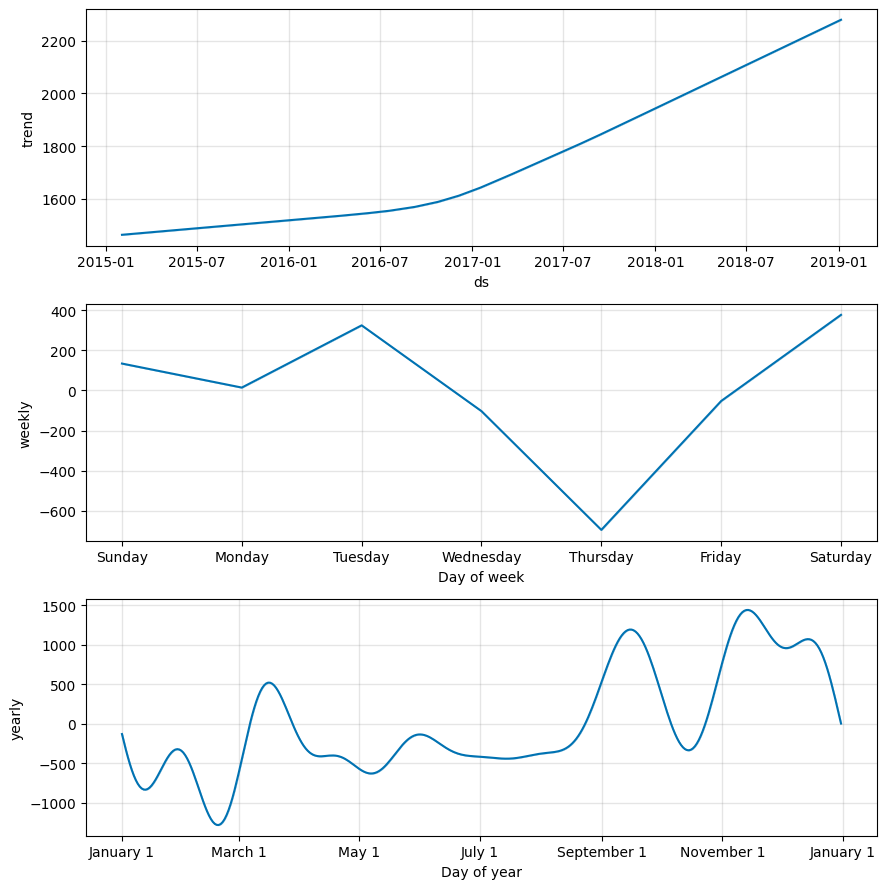

In [55]:
prophet.plot_components(forecasts_prophet)
plt.show()

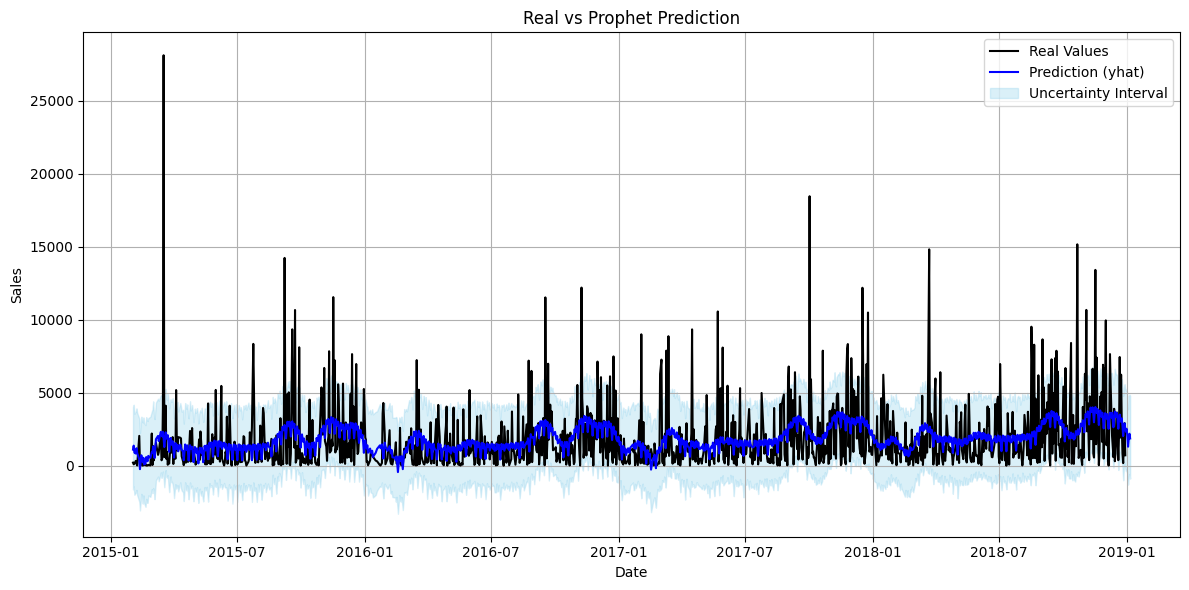

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_prophet['ds'], daily_sales_prophet['y'], label='Real Values', color='black')

plt.plot(forecasts_prophet['ds'], forecasts_prophet['yhat'], label='Prediction (yhat)', color='blue')

plt.fill_between(forecasts_prophet['ds'],
                 forecasts_prophet['yhat_lower'],
                 forecasts_prophet['yhat_upper'],
                 color='skyblue',
                 alpha=0.3,
                 label='Uncertainty Interval')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Real vs Prophet Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The graph compares real daily sales (black line) with Prophet’s predictions (blue line) and its uncertainty interval (light blue area). The model effectively captures the overall seasonality and trend, smoothing out extreme fluctuations. However, it fails to predict sharp spikes in sales, which may limit its use for precise short-term forecasting. Still, it provides a reliable baseline for strategic planning and trend analysis.

In [57]:
df.head(15)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,year,month,day,day_of_week,week,is_weekend,season,Sales_lag1,Sales_lag7,Sales_lag30
Order Date,,,,,,,,,,,,,,,,,,,,,
2015-02-02,CA-2015-139857,2015-02-06,Standard Class,CD-12790,Cynthia Delaney,Home Office,San Diego,California,92037.0,West,...,2015,2,2,0,6,0,Winter,468.900,1097.250,16.448
2015-02-02,CA-2015-123400,2015-02-09,Standard Class,EB-13930,Eric Barreto,Consumer,Saint Petersburg,Florida,33710.0,South,...,2015,2,2,0,6,0,Winter,468.900,1097.250,16.448
2015-02-02,CA-2015-123400,2015-02-09,Standard Class,EB-13930,Eric Barreto,Consumer,Saint Petersburg,Florida,33710.0,South,...,2015,2,2,0,6,0,Winter,468.900,1097.250,16.448
2015-02-03,CA-2015-111059,2015-02-06,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Seattle,Washington,98105.0,West,...,2015,2,3,1,6,0,Winter,211.646,426.670,288.060
2015-02-03,CA-2015-111059,2015-02-06,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Seattle,Washington,98105.0,West,...,2015,2,3,1,6,0,Winter,211.646,426.670,288.060
2015-02-04,CA-2015-107181,2015-02-08,Standard Class,DB-13270,Deborah Brumfield,Home Office,San Diego,California,92024.0,West,...,2015,2,4,2,6,0,Winter,97.112,3.928,19.536
2015-02-04,CA-2015-104808,2015-02-08,Second Class,MH-17440,Mark Haberlin,Corporate,Escondido,California,92025.0,West,...,2015,2,4,2,6,0,Winter,97.112,3.928,19.536
2015-02-04,CA-2015-107181,2015-02-08,Standard Class,DB-13270,Deborah Brumfield,Home Office,San Diego,California,92024.0,West,...,2015,2,4,2,6,0,Winter,97.112,3.928,19.536
2015-02-06,CA-2015-131905,2015-02-09,First Class,ND-18460,Neil Ducich,Corporate,Chesapeake,Virginia,23320.0,South,...,2015,2,6,4,6,0,Winter,0.000,240.500,87.158


In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
daily_sales_sarima = df.groupby("Order Date")["Sales"].sum().reset_index()
daily_sales_sarima.set_index("Order Date", inplace=True)

full_range = pd.date_range(start=daily_sales_sarima.index.min(), end=daily_sales_sarima.index.max(), freq="D")
daily_sales_sarima = daily_sales_sarima.reindex(full_range)
daily_sales_sarima.index.name = "Order Date"
daily_sales_sarima = daily_sales_sarima.ffill()

In [60]:
daily_sales_sarima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1428 entries, 2015-02-02 to 2018-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   1428 non-null   float64
dtypes: float64(1)
memory usage: 22.3 KB


In [61]:
daily_sales_sarima.head()

,Sales
Order Date,
2015-02-02,211.646
2015-02-03,97.112
2015-02-04,134.384
2015-02-05,134.384
2015-02-06,330.512


In [62]:
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Test Result")
    print("-------------------------")
    print(f"ADF statistics: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    
    if result[1] <= 0.05:
        print("This series is stationary. (p ≤ 0.05)")
    else:
        print("This series is not stationary. (p > 0.05)")

adf_test(daily_sales_sarima['Sales'])

ADF Test Result
-------------------------
ADF statistics: -6.360842289986075
p-value: 2.4767696579168432e-08
Critical Values:
   1%: -3.4349896798463924
   5%: -2.8635890925399354
   10%: -2.567860927320659
This series is stationary. (p ≤ 0.05)


PROPHET Model
Advantages:
- Can automatically model time series trends and seasonal cycles (e.g., weekly/seasonal sales).
- No need to create other features besides the date column.
- Provides information about prediction reliability with uncertainty intervals (yhat_lower, yhat_upper).
- Can be set up and run quickly, with low data preparation costs.

Disadvantages:
- Cannot learn complex relationships (e.g., lag, category effects).
- Does not include advanced predictions based on feature engineering.
- Predictions may be flat/dull if the data is highly variable.
- May slow down with large data sets.

Suitable for:
- When predicting seasonal or date-based fluctuations
- When seeking fast, explainable, low-maintenance models
- When the data set is small to medium in size


SARIMA Model
Advantages:
- Can statistically robustly model autocorrelation, trend, and seasonality in time series.
- Can perform well, especially for series with periodic, regular structures.
- Has a flexible structure thanks to parameter settings (p, d, q, P, D, Q, s).
- Enables advanced residual analysis (ACF, PACF, Ljung-Box, etc.).
- Some external effects can be added to the model with exogenous variable (SARIMAX) support.

Disadvantages:
- Parameter tuning (grid search, AIC/BIC selection, etc.) can be complex and time-consuming.
- The model cannot be constructed without determining the seasonality period.
- It cannot model complex relationships due to its linear assumptions.
- Requires data preprocessing (smoothing, differencing, etc.).
- Error accumulation may occur in long-term forecasts.
- Modeling process may be slow with large data sets.

Suitable Cases:
- If there is a clear seasonal structure in the time series (e.g., monthly sales cycles)
- If statistical explainability and predictability are required
- If parametric control is desired by expert users
- If the data can be relatively stabilized and is regular

In [63]:
sarima=SARIMAX(endog=daily_sales_sarima,
              order=(2, 0, 0),
              seasonal_order=(2, 1, 0, 7),
              enforce_invertibility=False,
              enforce_stationarity=False
            )

In [64]:
results=sarima.fit(disp=False)

In [65]:
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                 1428
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 7)   Log Likelihood              -12937.626
Date:                           Thu, 07 Aug 2025   AIC                          25885.251
Time:                                   14:11:02   BIC                          25911.490
Sample:                               02-02-2015   HQIC                         25895.058
                                    - 12-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0867      0.025      3.491      0.000       0.038       0.135
ar.L2          0.0709      0.028      2.566

In [66]:
forecast_steps=7
forecasts_sarima = results.get_forecast(steps=forecast_steps)
forecast_sarima_mean = forecasts_sarima.summary_frame().reset_index()
forecast_sarima_mean.rename(columns={'index': 'ds', 'mean': 'yhat_sarima'}, inplace=True)

forecast_ci = forecasts_sarima.conf_int()

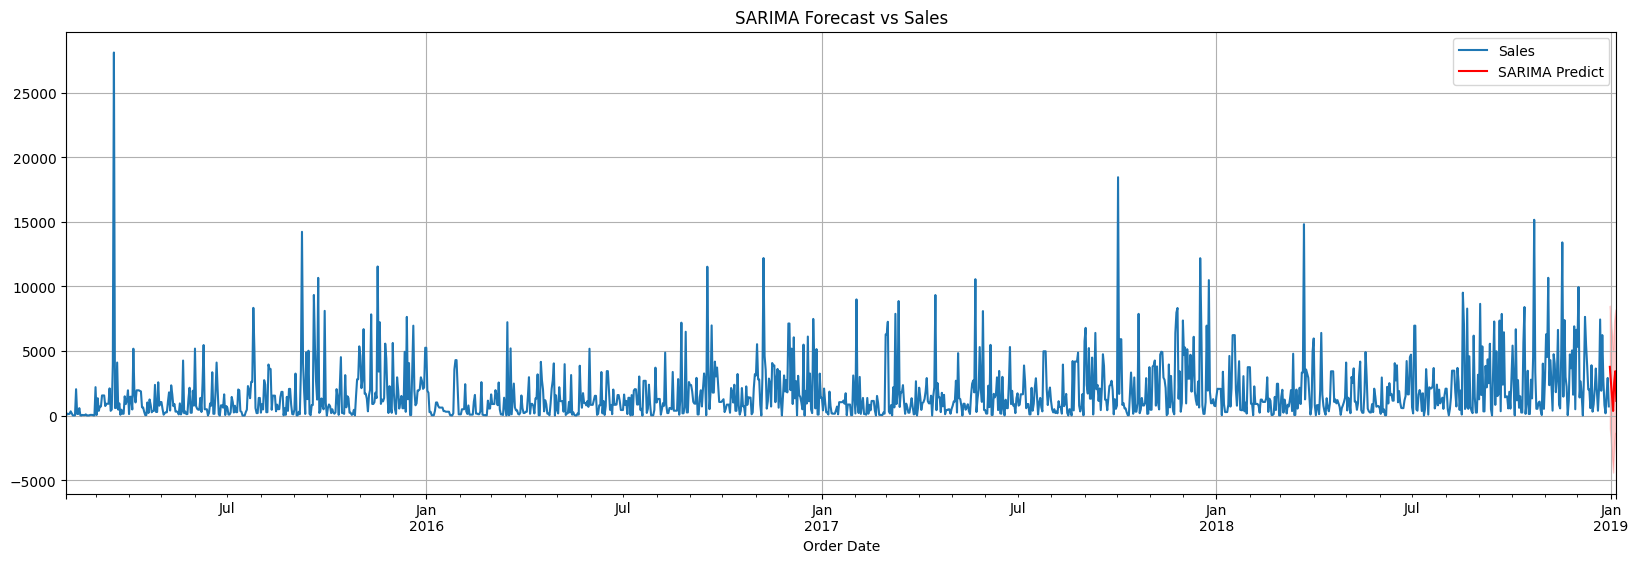

In [67]:
ax = daily_sales_sarima['Sales'].plot(label='Sales', figsize=(20, 6))
forecasts_sarima.predicted_mean.plot(ax=ax, label='SARIMA Predict', color='red')

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1],
                color='red', alpha=0.2)

plt.title("SARIMA Forecast vs Sales")
plt.grid(True)
plt.legend()
plt.show()

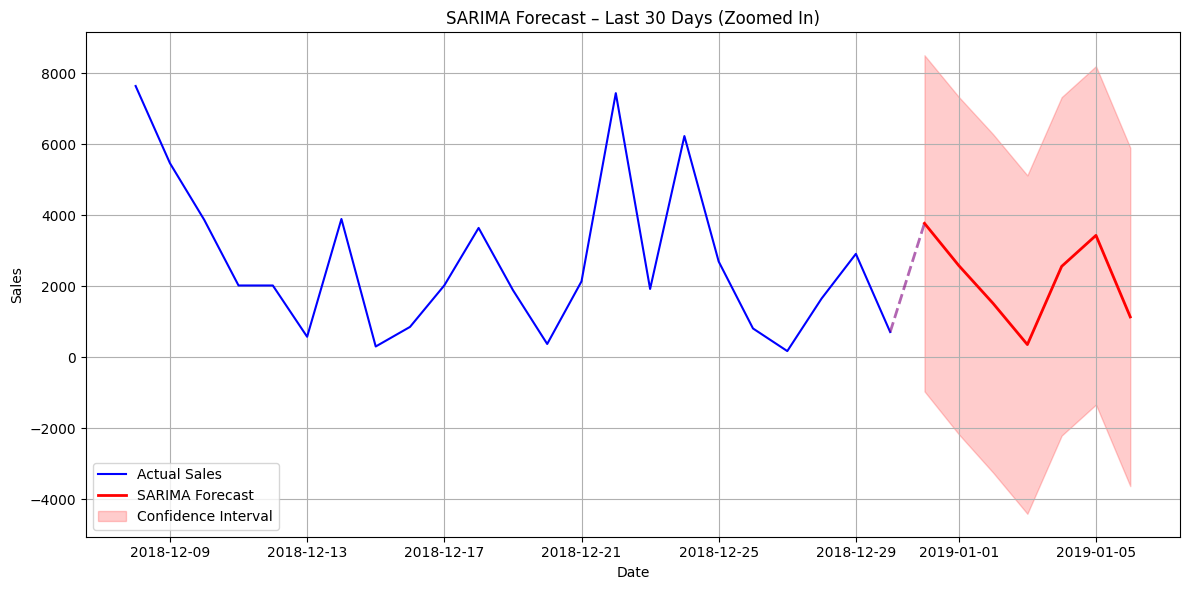

In [68]:
plt.figure(figsize=(12, 6))

last_23 = daily_sales_sarima.tail(23)
forecast_index = forecasts_sarima.predicted_mean.index
forecast_values = forecasts_sarima.predicted_mean
forecast_ci = forecasts_sarima.conf_int()

transition_index = [last_23.index[-1], forecast_index[0]]
transition_values = [last_23['Sales'].iloc[-1], forecast_values.iloc[0]]

plt.plot(last_23.index, last_23['Sales'], label='Actual Sales', color='blue')

plt.plot(transition_index, transition_values, color='purple', linestyle='--', linewidth=2, alpha=0.6)

plt.plot(forecast_index, forecast_values, label='SARIMA Forecast', color='red', linewidth=2)

plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='red', alpha=0.2, label='Confidence Interval')

plt.title("SARIMA Forecast – Last 30 Days (Zoomed In)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The chart compares SARIMA’s 7-day sales forecast with actual data. While the model captures general trends, it fails to predict sudden spikes. The confidence interval reflects uncertainty. It’s useful for short-term planning but should be used cautiously due to high variability.

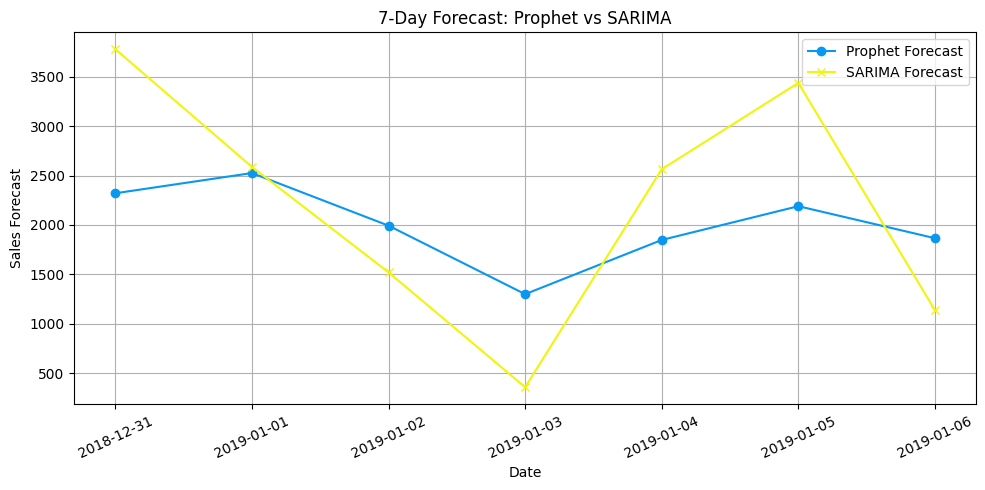

In [69]:
comparison_df = pd.merge(forecasts_prophet_7, forecast_sarima_mean[['ds', 'yhat_sarima']], on='ds', how='inner')

plt.figure(figsize=(10, 5))
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Prophet Forecast', marker='o',color="#0997F0")
plt.plot(comparison_df['ds'], comparison_df['yhat_sarima'], label='SARIMA Forecast', marker='x',color="#F1F509")
plt.title('7-Day Forecast: Prophet vs SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Forecast')
plt.legend()
plt.grid(True)
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

This comparative chart shows 7-day sales forecasts from both Prophet and SARIMA models. 
Prophet forecasts follow a smoother and more balanced trend, while SARIMA forecasts exhibit sharper fluctuations. 
The significant deviations in SARIMA on certain days may indicate higher sensitivity of the model. 
Given its consistent predictions, Prophet might be a more reliable option for short-term operational planning.

In [70]:
forecast_sarima_mean.columns

Index(['ds', 'yhat_sarima', 'mean_se', 'mean_ci_lower', 'mean_ci_upper'], dtype='object', name='Sales')

In [71]:
y_test = df.groupby("Order Date")["Sales"].sum().reset_index().tail(7)['Sales'].values

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


yhat_prophet = forecasts_prophet_7['yhat'].values
yhat_sarima = forecast_sarima_mean['yhat_sarima'].values  

rmse_prophet=np.sqrt(mean_squared_error(y_test,yhat_prophet))
rmse_sarima=np.sqrt(mean_squared_error(yhat_sarima,yhat_prophet))

mape_prophet=mean_absolute_percentage_error(y_test,yhat_prophet)
mape_sarima=mean_absolute_percentage_error(y_test,yhat_sarima)

r2_prophet=r2_score(y_test,yhat_prophet)
r2_sarima=r2_score(y_test,yhat_sarima)

print(f"Prophet RMSE: {rmse_prophet:.2f}, MAPE: %{mape_prophet:.2f}, R2:{r2_prophet:.2f}")
print(f"SARIMA  RMSE: {rmse_sarima:.2f}, MAPE: %{mape_sarima:.2f}, R2:{r2_sarima:.2f}")

Prophet RMSE: 1685.21, MAPE: %149.17, R2:0.22
SARIMA  RMSE: 911.91, MAPE: %52.21, R2:0.69


In [72]:
import itertools
param_grid_prophet = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

all_params_prophet = [dict(zip(param_grid_prophet.keys(), v)) for v in itertools.product(*param_grid_prophet.values())]

errors = []

df_prophet = daily_sales_prophet[['ds', 'y']].copy()

for params in all_params_prophet:
    model = Prophet(**params)
    model.fit(df_prophet)
    
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    
    y_true = df_prophet['y'].values
    y_pred = forecast['yhat'][:len(y_true)].values

    error = mean_absolute_error(y_true, y_pred)
    errors.append(error)

best_params_prophet = all_params_prophet[errors.index(min(errors))]
print("Best Parameters", best_params_prophet)

14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] done processing
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
14:11:03 - cmdstanpy - INFO - Chain [1] done processing
14:11:04 - cmdstanpy - INFO - Chain [1] start processing
14:11:04 - cmdstanpy - INFO - Chain [1] done processing
14:11:04 - cmdstanpy - INFO - Chain [1] start processing
14:11:04 - cmdstanpy - INFO - Chain [1] done processing
14:11:04 - cmdstanpy - INFO - Chain [1] start processing
14:11:04 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:05 - cmdstanpy - INFO - Chain [1] done processing
14:11:06 - cmdstanpy - INFO - Chain [1] start processing
14:11:06 - cmdstanpy - INFO - Chain [1]

Best Parameters {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


In [73]:
best_params={
    'changepoint_prior_scale': 0.01,
    'seasonality_prior_scale': 1.0,
    'seasonality_mode': 'additive'
}
prophet_tuning=Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    seasonality_mode=best_params['seasonality_mode']
)

prophet_tuning.fit(daily_sales_prophet)
future_prophet_tuning = model.make_future_dataframe(periods=7)
forecast_tuning=prophet_tuning.predict(future_prophet_tuning)

14:11:13 - cmdstanpy - INFO - Chain [1] start processing
14:11:13 - cmdstanpy - INFO - Chain [1] done processing


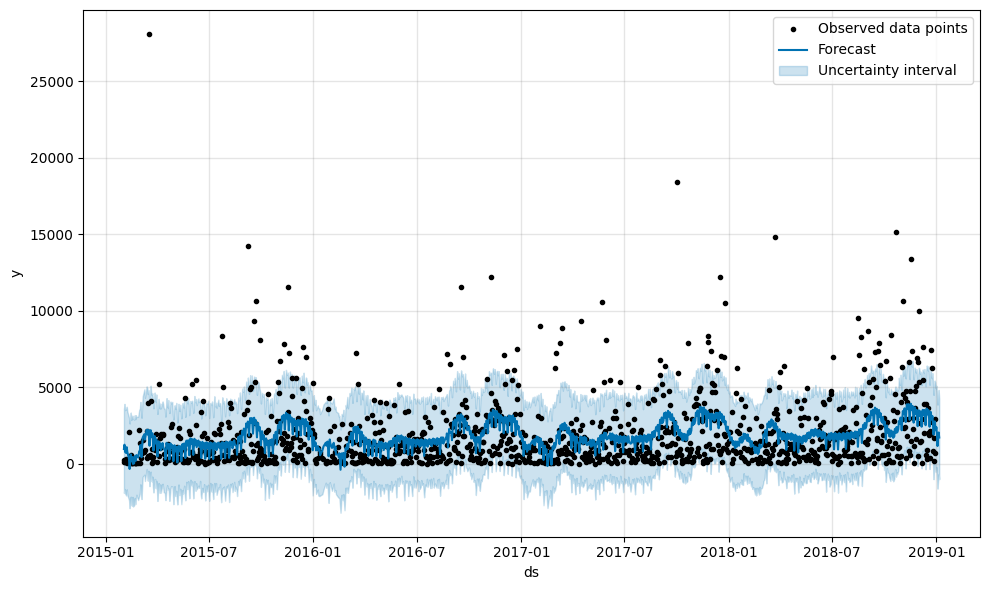

In [74]:
prophet_tuning.plot(forecast_tuning)
plt.legend()
plt.show()

This model successfully captures regular seasonal fluctuations in sales data.
While the forecast line follows the overall trend, it does not account for outliers such as sudden spikes. 
This forecasting approach can support business decisions, especially for products with stable trends and seasonal patterns. 

In [75]:
y_true=df_prophet["y"]
y_pred=forecasts_prophet["yhat"][:len(df_prophet)]

mae_ht = mean_absolute_error(y_true, y_pred)
rmse_ht = np.sqrt(mean_squared_error(y_true, y_pred))
mape_ht = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2_ht = r2_score(y_true, y_pred)

print(f"MAE  : {mae_ht:.2f}")
print(f"RMSE : {rmse_ht:.2f}")
print(f"MAPE : {mape_ht:.2f}%")
print(f"R²   : {r2_ht:.4f}")

MAE  : 1417.62
RMSE : 2157.48
MAPE : 751.35%
R²   : 0.1233
